In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
import datetime

In [6]:

data = pd.read_csv('data_processing/rp5.ru/погода.csv')
table0 = data[['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)', 'T', 'W1', 'N']]
table0['hour'] = [time.strptime(n, "%d.%m.%Y %H:%M").tm_hour for n in table0['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']]
table0['day'] = [time.strptime(n, "%d.%m.%Y %H:%M").tm_mday for n in table0['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']]
table0['month'] = [time.strptime(n, "%d.%m.%Y %H:%M").tm_mon for n in table0['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']]
table0['year'] = [time.strptime(n, "%d.%m.%Y %H:%M").tm_year for n in table0['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']]
table0['status'] = [1 if n >= 12 else 0 for n in table0['hour']]
table0.drop(['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'], axis='columns', inplace=True)
table0 = table0.sort_values(by=['year', 'month', 'day', 'hour'])
table0.loc[(table0['N'] == 'Облаков нет.') & (table0['W1'].isnull()), 'W1'] = 'Облаков нет.'
table0['W1'] = [np.nan if n == ' ' else n for n in table0['W1']]
table0 = table0.dropna()
table1 = table0.loc[(table0['month'] == 1)]
table2 = table0.loc[(table0['month'] == 2)]
table3 = table0.loc[(table0['month'] == 3)]
table4 = table0.loc[(table0['month'] == 4)]
table5 = table0.loc[(table0['month'] == 5)]
table6 = table0.loc[(table0['month'] == 6)]
table7 = table0.loc[(table0['month'] == 7)]
table8 = table0.loc[(table0['month'] == 8)]
table9 = table0.loc[(table0['month'] == 9)]
table10 = table0.loc[(table0['month'] == 10)]
table11 = table0.loc[(table0['month'] == 11)]
table12 = table0.loc[(table0['month'] == 12)]
table_np0 = table0.values
table_np1 = table1.values
table_np2 = table2.values
table_np3 = table3.values
table_np4 = table4.values
table_np5 = table5.values
table_np6 = table6.values
table_np7 = table7.values
table_np8 = table8.values
table_np9 = table9.values
table_np10 = table10.values
table_np11 = table11.values
table_np12 = table12.values


/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [7]:
def preprocessing(data):
    processing_data = data
    for i in processing_data:
        if i[1] in {'Ливень (ливни).', 'Дождь.', 'Морось.', 'Туман или ледяной туман или сильная мгла.', 'Гроза (грозы) с осадками или без них.'}:
            i[1] = 2
        elif i[1] in {'Снег и/или другие виды твердых осадков', 'Дождь со снегом или другими видами твердых осадков', 'Метель', 'Буря'}:
            i[1] = 3
        elif i[1] in {'Облака покрывали более половины неба в течение всего соответствующего периода.',
                      'Облака покрывали более половины неба в течение одной части соответствующего периода и половину или менее в течение другой части периода.'}:
            i[1] = 1
        else:
            i[1] = 0
    return processing_data

In [8]:
def preprocessing(data):
    processing_data = data
    for i in processing_data:
        if i[1] in {'Ливень (ливни).', 'Дождь.', 'Морось.', 'Туман или ледяной туман или сильная мгла.', 'Гроза (грозы) с осадками или без них.'}:
            i[1] = 2
        elif i[1] in {'Снег и/или другие виды твердых осадков', 'Дождь со снегом или другими видами твердых осадков', 'Метель', 'Буря'}:
            i[1] = 3
        elif i[1] in {'Облака покрывали более половины неба в течение всего соответствующего периода.',
                      'Облака покрывали более половины неба в течение одной части соответствующего периода и половину или менее в течение другой части периода.'}:
            i[1] = 1
        else:
            i[1] = 0
    return processing_data

def voiting(data):
    cond_0 = 0
    cond_1 = 0
    cond_2 = 0
    cond_3 = 0
    if len(data) != 8:
        for i in data:
            if i[1] == 0:
                cond_0 += 1
            if i[1] == 1:
                cond_1 += 1
            if i[1] == 2:
                cond_2 += 1
            if i[1] == 3:
                cond_3 += 1
    else:
        return data
    res = np.copy(data[0])
    res[1] = np.argmax([cond_0, cond_1, cond_2, cond_3])
    res[0] = np.mean(data.T[0])
    return res

def data_aggregate(data):
    new_data = np.array([])
    i = 0
    while i < data.shape[0]:
        _date = data[i][4]
        _status = data[i][7]
        processing = np.array([])
        processing = np.append(processing, np.copy(data[i]))
        if i+1 < data.shape[0]:
            while (data[i+1][4] == _date) and (data[i+1][7] == _status):
                processing = np.append(processing, data[i+1])
                processing = np.reshape(processing, (-1, len(data[i])))
                if i+2 < data.shape[0]:
                    i += 1
                else:
                    break
        result = voiting(processing)
        new_data = np.append(new_data, result)
        i += 1
    return np.reshape(new_data, (-1, len(data[i-1])))

In [9]:
t0 = preprocessing(table_np0)
t1 = preprocessing(table_np1)
t2 = preprocessing(table_np2)
t3 = preprocessing(table_np3)
t4 = preprocessing(table_np4)
t5 = preprocessing(table_np5)
t6 = preprocessing(table_np6)
t7 = preprocessing(table_np7)
t8 = preprocessing(table_np8)
t9 = preprocessing(table_np9)
t10 = preprocessing(table_np10)
t11 = preprocessing(table_np11)
t12 = preprocessing(table_np12)

data0 = data_aggregate(t0)
data1 = data_aggregate(t1)
data2 = data_aggregate(t2)
data3 = data_aggregate(t3)
data4 = data_aggregate(t4)
data5 = data_aggregate(t5)
data6 = data_aggregate(t6)
data7 = data_aggregate(t7)
data8 = data_aggregate(t8)
data9 = data_aggregate(t9)
data10 = data_aggregate(t10)
data11 = data_aggregate(t11)
data12 = data_aggregate(t12)

In [10]:
def temp_comp(data):
    result = np.array([])
    i = 0
    while i < data.shape[0]-1:
        if data[i+1][0] - data[i][0] < -5:
            result = np.append(result, 0)
        elif (data[i+1][0] - data[i][0] >= -5) and (data[i+1][0] - data[i][0] < -2):
            result = np.append(result, 1)
        elif (data[i+1][0] - data[i][0] >= -2) and (data[i+1][0] - data[i][0] <= 2):
            result = np.append(result, 2)
        elif (data[i+1][0] - data[i][0] > 2) and (data[i+1][0] - data[i][0] <= 5):
            result = np.append(result, 3)
        else:
            result = np.append(result, 4)
        i += 1
    return result

In [11]:
diff0 = temp_comp(data0)
diff1 = temp_comp(data1)
diff2 = temp_comp(data2)
diff3 = temp_comp(data3)
diff4 = temp_comp(data4)
diff5 = temp_comp(data5)
diff6 = temp_comp(data6)
diff7 = temp_comp(data7)
diff8 = temp_comp(data8)
diff9 = temp_comp(data9)
diff10 = temp_comp(data10)
diff11 = temp_comp(data11)
diff12 = temp_comp(data12)

In [12]:
diff0.shape

(4497,)

In [13]:
data1.shape

(512, 8)

In [14]:
df = pd.DataFrame({'T': data0.T[0], 'W': data0.T[1], 'C': data0.T[2],
                    'time': data0.T[3], 'day': data0.T[4], 'month': data0.T[5],
                    'year': data0.T[6], 'status': data0.T[7]})

In [15]:
df1 = pd.DataFrame({'T': data1.T[0], 'W': data1.T[1], 'C': data1.T[2],
                    'time': data1.T[3], 'day': data1.T[4], 'month': data1.T[5],
                    'year': data1.T[6], 'status': data1.T[7]})
df2 = pd.DataFrame({'T': data2.T[0], 'W': data2.T[1], 'C': data2.T[2],
                    'time': data2.T[3], 'day': data2.T[4], 'month': data2.T[5],
                    'year': data2.T[6], 'status': data2.T[7]})
df3 = pd.DataFrame({'T': data3.T[0], 'W': data3.T[1], 'C': data3.T[2],
                    'time': data3.T[3], 'day': data3.T[4], 'month': data3.T[5],
                    'year': data3.T[6], 'status': data3.T[7]})
df4 = pd.DataFrame({'T': data4.T[0], 'W': data4.T[1], 'C': data4.T[2],
                    'time': data4.T[3], 'day': data4.T[4], 'month': data4.T[5],
                    'year': data4.T[6], 'status': data4.T[7]})
df5 = pd.DataFrame({'T': data5.T[0], 'W': data5.T[1], 'C': data5.T[2],
                    'time': data5.T[3], 'day': data5.T[4], 'month': data5.T[5],
                    'year': data5.T[6], 'status': data5.T[7]})
df6 = pd.DataFrame({'T': data6.T[0], 'W': data6.T[1], 'C': data6.T[2],
                    'time': data6.T[3], 'day': data6.T[4], 'month': data6.T[5],
                    'year': data6.T[6], 'status': data6.T[7]})
df7 = pd.DataFrame({'T': data7.T[0], 'W': data7.T[1], 'C': data7.T[2],
                    'time': data7.T[3], 'day': data7.T[4], 'month': data7.T[5],
                    'year': data7.T[6], 'status': data7.T[7]})
df8 = pd.DataFrame({'T': data8.T[0], 'W': data8.T[1], 'C': data8.T[2],
                    'time': data8.T[3], 'day': data8.T[4], 'month': data8.T[5],
                    'year': data8.T[6], 'status': data8.T[7]})
df9 = pd.DataFrame({'T': data9.T[0], 'W': data9.T[1], 'C': data9.T[2],
                    'time': data9.T[3], 'day': data9.T[4], 'month': data9.T[5],
                    'year': data9.T[6], 'status': data9.T[7]})
df10 = pd.DataFrame({'T': data10.T[0], 'W': data10.T[1], 'C': data10.T[2],
                    'time': data10.T[3], 'day': data10.T[4], 'month': data10.T[5],
                    'year': data10.T[6], 'status': data10.T[7]})
df11 = pd.DataFrame({'T': data11.T[0], 'W': data11.T[1], 'C': data11.T[2],
                    'time': data11.T[3], 'day': data11.T[4], 'month': data11.T[5],
                    'year': data11.T[6], 'status': data11.T[7]})
df12 = pd.DataFrame({'T': data12.T[0], 'W': data12.T[1], 'C': data12.T[2],
                    'time': data12.T[3], 'day': data12.T[4], 'month': data12.T[5],
                    'year': data12.T[6], 'status': data12.T[7]})

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['C'])
df['C_l'] = le.transform(df['C'])
df.head()

,T,W,C,time,day,month,year,status,C_l
0,3.85,1,"90 или более, но не 100%",3,1,4,2010,0,7
1,13.3,0,Облаков нет.,15,3,4,2010,1,9
2,4.7,2,"90 или более, но не 100%",9,5,4,2010,0,7
3,8.65,2,"90 или более, но не 100%",12,5,4,2010,1,7
4,2.66667,1,70 – 80%.,0,6,4,2010,0,6


In [17]:
df['date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df.year, df.month, df.day)])
df.set_index('date', inplace=True, drop=True)

In [18]:
df.loc[(df['status'] == 0)]

,T,W,C,time,day,month,year,status,C_l
date,,,,,,,,,
2010-04-01,3.85,1,"90 или более, но не 100%",3,1,4,2010,0,7
2010-04-05,4.7,2,"90 или более, но не 100%",9,5,4,2010,0,7
2010-04-06,2.66667,1,70 – 80%.,0,6,4,2010,0,6
2010-04-07,3.36667,0,20–30%.,3,7,4,2010,0,2
2010-04-09,2.55,2,Небо не видно из-за тумана и/или других метеор...,3,9,4,2010,0,8
2010-04-10,3.06667,0,20–30%.,3,10,4,2010,0,2
2010-04-13,2.3,0,Облаков нет.,0,13,4,2010,0,9
2010-04-15,3.76667,2,60%.,0,15,4,2010,0,5
2010-04-18,6.65,2,100%.,0,18,4,2010,0,1


In [19]:
df

,T,W,C,time,day,month,year,status,C_l
date,,,,,,,,,
2010-04-01,3.85,1,"90 или более, но не 100%",3,1,4,2010,0,7
2010-04-03,13.3,0,Облаков нет.,15,3,4,2010,1,9
2010-04-05,4.7,2,"90 или более, но не 100%",9,5,4,2010,0,7
2010-04-05,8.65,2,"90 или более, но не 100%",12,5,4,2010,1,7
2010-04-06,2.66667,1,70 – 80%.,0,6,4,2010,0,6
2010-04-07,3.36667,0,20–30%.,3,7,4,2010,0,2
2010-04-09,2.55,2,Небо не видно из-за тумана и/или других метеор...,3,9,4,2010,0,8
2010-04-09,8.6,1,20–30%.,12,9,4,2010,1,2
2010-04-10,3.06667,0,20–30%.,3,10,4,2010,0,2


/home/dmitry/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


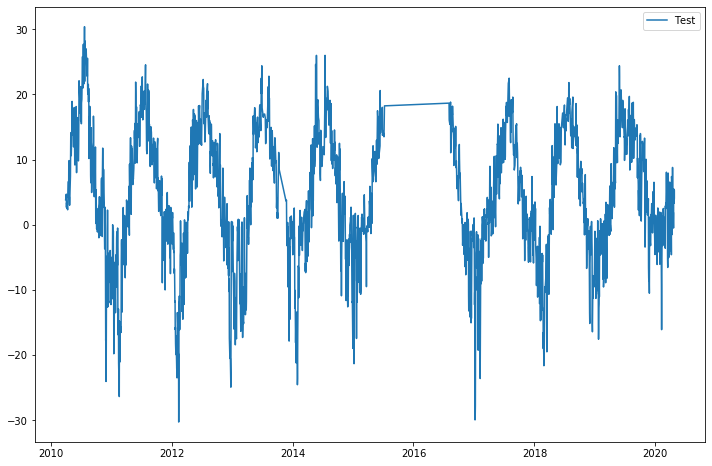

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
#plt.plot(y1_train, label = 'Train')
plt.plot(df.loc[(df['status'] == 0)]['T'], label = 'Test')
plt.legend(loc='best')
plt.show()

In [21]:
df.loc[(df['status'] == 0)][0:df.loc[(df['status'] == 0)].shape[0]-91]
df.loc[(df['status'] == 0)][df.loc[(df['status'] == 0)].shape[0]-91:]

,T,W,C,time,day,month,year,status,C_l
date,,,,,,,,,
2020-01-01,0.625,2,100%.,0,1,1,2020,0,1
2020-01-02,-1.06667,3,100%.,3,2,1,2020,0,1
2020-01-03,1.46667,2,100%.,0,3,1,2020,0,1
2020-01-05,0.1,3,60%.,0,5,1,2020,0,5
2020-01-06,-1.075,3,100%.,0,6,1,2020,0,1
2020-01-07,-2.53333,3,100%.,3,7,1,2020,0,1
2020-01-08,-0.133333,2,100%.,3,8,1,2020,0,1
2020-01-09,-0.533333,2,100%.,3,9,1,2020,0,1
2020-01-11,-0.2,1,100%.,6,11,1,2020,0,1


In [22]:
#df1['T'][0:df1.shape[0]-55]

In [25]:
from sklearn.model_selection import train_test_split

#X1 = df1.drop(['T', 'C'], axis=1)
#(X1_train, 
# X1_test, 
# y1_train, y1_test) = train_test_split(X1, df1['T'], 
#                                     test_size=0.3, random_state=0)

X1 = df.loc[(df['status'] == 0)].drop(['T', 'C'], axis=1)

X1_train =  X1[0:df.loc[(df['status'] == 0)].shape[0]-91]
X1_test = X1[df.loc[(df['status'] == 0)].shape[0]-91:]
y1_train = df.loc[(df['status'] == 0)][['T']][0:df.loc[(df['status'] == 0)].shape[0]-91]
y1_test = df.loc[(df['status'] == 0)][['T']][df.loc[(df['status'] == 0)].shape[0]-91:]

In [26]:
y1_train

,T
date,
2010-04-01,3.85
2010-04-05,4.7
2010-04-06,2.66667
2010-04-07,3.36667
2010-04-09,2.55
2010-04-10,3.06667
2010-04-13,2.3
2010-04-15,3.76667
2010-04-18,6.65


In [27]:
from sklearn.linear_model import LogisticRegression

optimizer = LinearRegression()
optimizer.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

pred1 = optimizer.predict(X1_test)


rmse = (mean_squared_error(y1_test, pred1))
print(rmse)

24.407526727836238


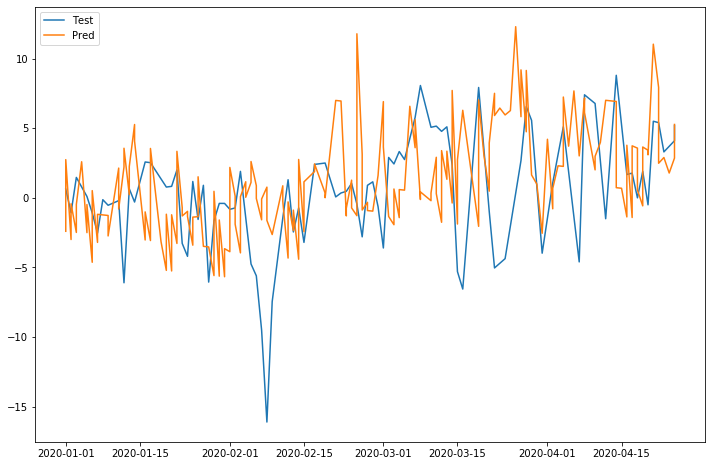

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
#plt.plot(y1_train, label = 'Train')
plt.plot(y1_test, label = 'Test')
plt.plot(y_pred, label = 'Pred')
plt.legend(loc='best')
plt.show()

In [48]:
y_pred = pd.DataFrame.copy(y1_test)

In [49]:
y_pred['T'] = pred1
y_pred

,T
date,
2020-01-01,-2.401923
2020-01-01,2.743482
2020-01-02,-2.992756
2020-01-02,-0.427734
2020-01-03,-2.485027
2020-01-03,-0.469286
2020-01-04,2.591156
2020-01-05,-2.499080
2020-01-05,-0.483340


In [163]:
from sklearn import metrics, tree

clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X1_train, y1_train.astype('int'))
reg_tree_pred = clf.predict(X1_test)
rmse = (mean_squared_error(y1_test.astype('int'), reg_tree_pred))
print(rmse)

48.767955801104975


In [154]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X1_train, y1_train.astype('int'))
svm_pred = svm_clf.predict(X1_test)
#print(metrics.accuracy_score(svm_pred, y1_test.astype('int')))
rmse = (mean_squared_error(y1_test.astype('int'), svm_pred))
print(rmse)

/home/dmitry/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


143.97237569060775


/home/dmitry/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [136]:
basel = pd.read_csv('data_basel.csv')

In [139]:
basel.columns

Index(['location', 'Basel', 'Basel.1', 'Basel.2', 'Basel.3'], dtype='object')

In [56]:
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [99]:
stepwise_model = auto_arima(y1_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
#                            d=1, D=1,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,0,1,12) [intercept=True]; AIC=12248.453, BIC=12277.053, Time=3.709 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=16855.713, BIC=16867.154, Time=0.066 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=12317.331, BIC=12340.211, Time=3.384 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=14264.930, BIC=14287.810, Time=4.205 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=17059.591, BIC=17065.311, Time=0.048 seconds
Fit ARIMA(1,0,1)x(0,0,0,12) [intercept=True]; AIC=12246.648, BIC=12269.528, Time=0.514 seconds
Fit ARIMA(1,0,1)x(1,0,0,12) [intercept=True]; AIC=12248.447, BIC=12277.047, Time=4.390 seconds
Fit ARIMA(1,0,1)x(1,0,1,12) [intercept=True]; AIC=12248.954, BIC=12283.274, Time=8.935 seconds
Fit ARIMA(0,0,1)x(0,0,0,12) [intercept=True]; AIC=14877.982, BIC=14895.142, Time=0.408 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=12316.795, BIC=12333.955, Time=0.163 seconds
Fit AR

In [104]:
model = SARIMAX(y1_train.astype(float), order=(2, 0, 1),
               seasonal_order=(0, 0, 0, 12), 
               enforce_stationarity=True,
               enforce_invertibility=True).fit()

/home/dmitry/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/dmitry/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/dmitry/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [119]:
pred = model.predict(start = '2020', end = '2020')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

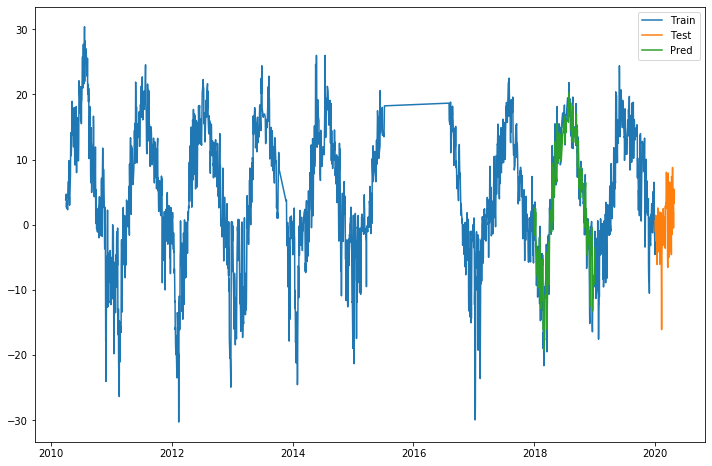

In [118]:

plt.figure(figsize=(12,8))
plt.plot(y1_train, label = 'Train')
plt.plot(y1_test, label = 'Test')
plt.plot(pred, label = 'Pred')
plt.legend(loc='best')
plt.show()